# dev deformation of isopotential lines
Tim Tyree<br>
3.16.2023

In [4]:
# # !pip uninstall -y numpy
# !conda install -y numba

In [5]:
import torch

In [6]:
# !which python
import numpy as np, numba

In [7]:
from lib.my_initialization import *

In [8]:
from lib import *
from lib.measure.curvature import *
from scipy import ndimage
%load_ext autoreload
%autoreload 2

In [10]:
#reset matplotlib settings
import matplotlib as mpl
# sns.reset_orig()
mpl.rc_file_defaults()

# define module

# load example problem in 2D

In [11]:
data_dir=f'{nb_dir}/Data/initial-conditions-suite-3-LR/contour_data/ic008.33_contours_t_110.pkl'
data = load_from_pickle(data_dir)
data.keys()

dict_keys(['t', 'model', 'dict_tips', 'ic_fn', 'df_contours', 'dict_contour_pairs', 'df_state_curr', 'df_state_next', 'dict_mean_state_curr', 'dict_mean_state_next', 'dict1d', 'dict2d'])

In [12]:
dict_contour_pairs = data['dict_contour_pairs']
df_contours = data['df_contours']
df_contours.head()

,ci_next,dist_next,mncurv,arclen,rhomin,rhomax,V_curr,V_next,dVdt_curr,dVdt_next
4,2,16.930733,0.060595,134.966477,-0.036749,1.914566,-50.089583,-48.334993,-0.098031,-0.287552
0,1,21.091253,0.029091,134.966477,-0.014000,0.300130,-63.554045,-54.581845,-0.647319,-0.800896
1,0,41.462801,0.052487,134.966477,-0.067075,0.653655,-46.084489,-51.082076,0.792103,0.068916


In [13]:
for ci1,row in df_contours.iterrows():
    ci2=row['ci_next']


In [14]:
pts_curr = dict_contour_pairs[ci1]['pts_in']
pts_next = dict_contour_pairs[ci1]['pts_out']
# displacement = dict_contour_pairs[ci1]['displacement']
# dict_keys(['pts_in', 'pts_out', 'tck_in', 'tck_out', 'displacement', 'contour1', 'contour2', 'xy_shift', 'xy_shift_unwrap', 'ci2'])

In [15]:
com_curr_unwrap = np.mean(pts_curr,axis=1)
com_next_unwrap = np.mean(pts_next,axis=1)
displacement = com_next_unwrap - com_curr_unwrap
displacement

array([7.14747844, 8.02262208])

In [16]:
# plt.scatter(x=pts_in[0],y=pts_in[1],color='g',alpha=0.7)


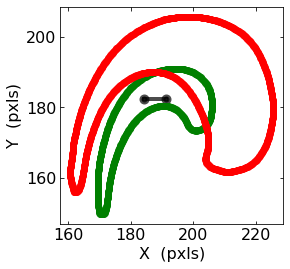

In [17]:
figsize=(4,4)
fontsize=16
fig,ax=plt.subplots(figsize=figsize)
# plt.quiver([com_curr_unwrap[0]],[com_curr_unwrap[1]],[displacement[0]],[displacement[1]],
#         lw=4,color='k',alpha=0.7,units='xy')
ax.scatter([com_curr_unwrap[0],com_curr_unwrap[0]+displacement[0]],
            [com_curr_unwrap[1],com_curr_unwrap[1]]+displacement[1],
        lw=4,color='k',alpha=0.7)#,units='xy')
ax.plot([com_curr_unwrap[0],com_curr_unwrap[0]+displacement[0]],
            [com_curr_unwrap[1],com_curr_unwrap[1]]+displacement[1],
        lw=4,color='k',alpha=0.7)#,units='xy')
ax.scatter(x=pts_curr[0],y=pts_curr[1],color='g',alpha=0.7)
# ax.scatter(x=pts_curr[0]+xy_shift[0],y=pts_curr[1]+xy_shift[1],color='g',alpha=0.7)
ax.scatter(x=pts_next[0],y=pts_next[1],color='r',alpha=0.7)
format_plot(ax=ax,fontsize=fontsize,xlabel='X  (pxls)',ylabel='Y  (pxls)')
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.show()

# copy/modify the pytorch3d solution for the dolfin problem

In [18]:
# !pip uninstall torchvision
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu115

In [22]:
import torch
# import torchvision
# from torch.utils.cpp import * #....
# from torch.utils.cpp_extension import *
# from torch.utils.cpp_extension_versioner import *
# from torch.utils import cpp_extension

In [25]:
# !conda install -y pytorch-cuda=11.5 -c pytorch -c nvidia
# !conda install -y pytorch3d -c pytorch3d
# torch.__version__
# !which python
!python --version

Python 3.9.13


In [21]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.13.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip3 install fvcore iopath
        !pip3 install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip3 install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

AttributeError: module 'torch' has no attribute '__version__'

In [28]:
# from pytorch3d.io import load_obj, save_obj
# !pip install pytorch3d
!conda install -y jupyter


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/timothytyree/miniconda3/envs/pyenv_ub

  added / updated specs:
    - jupyter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dbus-1.13.6                |       h5008d03_3         604 KB  conda-forge
    gst-plugins-base-1.18.4    |       h29181c9_0         2.5 MB  conda-forge
    gstreamer-1.18.5           |       h9f60fe5_3         2.0 MB  conda-forge
    jupyter_console-6.5.1      |     pyhd8ed1ab_0          25 KB  conda-forge
    libclang-11.1.0            |default_ha53f305_1        19.2 MB  conda-forge
    libxkbcommon-1.0.3         |       he3ba5ed_0         581 KB  conda-forge
    mysql-common-8.0.31        |     

gst-plugins-base-1.1 | 2.5 MB    | ##################################### | 100% 







pyqt-5.12.3          | 6.5 MB    | ########################1             |  65% 









jupyter_console-6.5. | 25 KB     | #######################5              |  64% 






qt-5.12.9            | 99.5 MB   | 5                                     |   2% 









jupyter_console-6.5. | 25 KB     | ##################################### | 100% 

libclang-11.1.0      | 19.2 MB   | ####################6                 |  56% 







pyqt-5.12.3          | 6.5 MB    | ############################5         |  77% 






qt-5.12.9            | 99.5 MB   | 8                                     |   2% 




mysql-libs-8.0.31    | 1.9 MB    | ##################################### | 100% 




mysql-libs-8.0.31    | 1.9 MB    | ##################################### | 100% 

libclang-11.1.0      | 19.2 MB   | ########################4             |  66% 







pyqt-5.12.3          | 6.5 MB    | #############

In [29]:
!pip install scikit-image matplotlib imageio plotly opencv-python
!pip install black usort flake8 flake8-bugbear flake8-comprehensions

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached usort-1.0.5-py3-none-any.whl (23 kB)
  Using cached flake8-6.0.0-py2.py3-none-any.whl (57 kB)
  Using cached flake8_bugbear-23.3.12-py3-none-any.whl (28 kB)
  Using cached flake8_comprehensions-3.10.1-py3-none-any.whl (7.3 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
  Using cached pathspec-0.11.1-py3-none-any.whl (29 kB)
  Using cached trailrunner-1.3.0-py3-none-any.whl (10 kB)
  Using cached moreorless-0.4.0-py2.py3-none-any.whl (9.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 14.6 MB/s eta 0:00:0031m15.3 MB/s eta 0:00:01
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached stdlibs-2022.10.9-py3-none-any.whl (49 kB)
  Using cached pyflakes-3.0.1-py2.py3-none-a

In [ ]:
import os
import torch
from pytorch3d.io import load_obj, save_obj
from pytorch3d.structures import Meshes
from pytorch3d.utils import ico_sphere
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.loss import (
    chamfer_distance, 
    mesh_edge_loss, 
    mesh_laplacian_smoothing, 
    mesh_normal_consistency,
)
import numpy as np
from tqdm.notebook import tqdm
%matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

# Set the device
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("WARNING: CPU only, this will be slow!")

In [ ]:
#download obj
!wget https://dl.fbaipublicfiles.com/pytorch3d/data/dolphin/dolphin.obj
# Load the dolphin mesh.
trg_obj = os.path.join('dolphin.obj')

In [ ]:
# We read the target 3D model using load_obj
verts, faces, aux = load_obj(trg_obj)

# verts is a FloatTensor of shape (V, 3) where V is the number of vertices in the mesh
# faces is an object which contains the following LongTensors: verts_idx, normals_idx and textures_idx
# For this tutorial, normals and textures are ignored.
faces_idx = faces.verts_idx.to(device)
verts = verts.to(device)

# We scale normalize and center the target mesh to fit in a sphere of radius 1 centered at (0,0,0). 
# (scale, center) will be used to bring the predicted mesh to its original center and scale
# Note that normalizing the target mesh, speeds up the optimization but is not necessary!
center = verts.mean(0)
verts = verts - center
scale = max(verts.abs().max(0)[0])
verts = verts / scale

# We construct a Meshes structure for the target mesh
trg_mesh = Meshes(verts=[verts], faces=[faces_idx])

In [ ]:
# We initialize the source shape to be a sphere of radius 1
src_mesh = ico_sphere(4, device)

In [ ]:
def plot_pointcloud(mesh, title=""):
    # Sample points uniformly from the surface of the mesh.
    points = sample_points_from_meshes(mesh, 5000)
    x, y, z = points.clone().detach().cpu().squeeze().unbind(1)    
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.scatter3D(x, z, -y)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_zlabel('y')
    ax.set_title(title)
    ax.view_init(190, 30)
    plt.show()

In [ ]:
# %matplotlib notebook
plot_pointcloud(trg_mesh, "Target mesh")
plot_pointcloud(src_mesh, "Source mesh")


In [ ]:
#optimization loop
# We will learn to deform the source mesh by offsetting its vertices
# The shape of the deform parameters is equal to the total number of vertices in src_mesh
deform_verts = torch.full(src_mesh.verts_packed().shape, 0.0, device=device, requires_grad=True)
# The optimizer
optimizer = torch.optim.SGD([deform_verts], lr=1.0, momentum=0.9)
# Number of optimization steps
Niter = 2000
# Weight for the chamfer loss
w_chamfer = 1.0 
# Weight for mesh edge loss
w_edge = 1.0 
# Weight for mesh normal consistency
w_normal = 0.01 
# Weight for mesh laplacian smoothing
w_laplacian = 0.1 
# Plot period for the losses
plot_period = 250
loop = tqdm(range(Niter))

chamfer_losses = []
laplacian_losses = []
edge_losses = []
normal_losses = []

%matplotlib inline

for i in loop:
    # Initialize optimizer
    optimizer.zero_grad()
    
    # Deform the mesh
    new_src_mesh = src_mesh.offset_verts(deform_verts)
    
    # We sample 5k points from the surface of each mesh 
    sample_trg = sample_points_from_meshes(trg_mesh, 5000)
    sample_src = sample_points_from_meshes(new_src_mesh, 5000)
    
    # We compare the two sets of pointclouds by computing (a) the chamfer loss
    loss_chamfer, _ = chamfer_distance(sample_trg, sample_src)
    
    # and (b) the edge length of the predicted mesh
    loss_edge = mesh_edge_loss(new_src_mesh)
    
    # mesh normal consistency
    loss_normal = mesh_normal_consistency(new_src_mesh)
    
    # mesh laplacian smoothing
    loss_laplacian = mesh_laplacian_smoothing(new_src_mesh, method="uniform")
    
    # Weighted sum of the losses
    loss = loss_chamfer * w_chamfer + loss_edge * w_edge + loss_normal * w_normal + loss_laplacian * w_laplacian
    
    # Print the losses
    loop.set_description('total_loss = %.6f' % loss)
    
    # Save the losses for plotting
    chamfer_losses.append(float(loss_chamfer.detach().cpu()))
    edge_losses.append(float(loss_edge.detach().cpu()))
    normal_losses.append(float(loss_normal.detach().cpu()))
    laplacian_losses.append(float(loss_laplacian.detach().cpu()))
    
    # Plot mesh
    if i % plot_period == 0:
        plot_pointcloud(new_src_mesh, title="iter: %d" % i)
        
    # Optimization step
    loss.backward()
    optimizer.step()

In [ ]:
#visualize the loss
fig = plt.figure(figsize=(13, 5))
ax = fig.gca()
ax.plot(chamfer_losses, label="chamfer loss")
ax.plot(edge_losses, label="edge loss")
ax.plot(normal_losses, label="normal loss")
ax.plot(laplacian_losses, label="laplacian loss")
ax.legend(fontsize="16")
ax.set_xlabel("Iteration", fontsize="16")
ax.set_ylabel("Loss", fontsize="16")
ax.set_title("Loss vs iterations", fontsize="16");

In [ ]:
# Fetch the verts and faces of the final predicted mesh
final_verts, final_faces = new_src_mesh.get_mesh_verts_faces(0)

# Scale normalize back to the original target size
final_verts = final_verts * scale + center

# Store the predicted mesh using save_obj
final_obj = os.path.join('./', 'final_model.obj')
save_obj(final_obj, final_verts, final_faces)